## **Question 1:- What is Information Gain, and how is it used in Decision Trees?**

### **Answer**

Information Gain (IG) is a key concept from information theory used in Decision Trees to determine which feature (attribute) best splits the data at each step. It measures how much uncertainty (entropy) about the target variable is reduced when we split the dataset based on a given feature.

1. Entropy — Measuring Uncertainty

Entropy quantifies the impurity or randomness in the dataset.

$$
C_1, C_2, \ldots, C_k
$$





$$
Entropy(S) = - \sum_{i=1}^{k} p_i \log_2(p_i)
$$

where
𝑝
𝑖
	​

 = proportion of examples in
𝑆
S that belong to class
𝐶
𝑖
	​

.

Entropy = 0 → perfectly pure (all examples belong to one class)

Entropy = 1 → maximum impurity (50/50 split between two classes)


**2. Information Gain** — Reduction in Entropy

When we split the dataset
𝑆
 based on an attribute
𝐴
, it divides
𝑆
 into subsets
𝑆
1
,
𝑆
2
,
.
.
.
,
𝑆
𝑛

The Information Gain from splitting on
𝐴
A is:

$$
IG(S, A) = Entropy(S) - \sum_{j=1}^{n} \frac{|S_j|}{|S|} Entropy(S_j)
$$

𝐸
𝑛
𝑡
𝑟
𝑜
𝑝
𝑦
(
𝑆
)
Entropy(S): entropy before the split

The summation term: weighted average entropy after the split

Intuition:
Information Gain measures how much knowing the value of attribute
𝐴
A reduces the uncertainty about the target class.

**3. Using Information Gain in Decision Trees**

In algorithms like ID3 and C4.5, Information Gain is used as the splitting criterion:

1. For each feature
𝐴
A, calculate
𝐼
𝐺
(
𝑆
,
𝐴
)
IG(S,A).

2. Choose the feature with the highest Information Gain to split the node.

3. Recursively repeat this process for each child node until:

   * All instances belong to one class, or

   * No features remain, or

   * A stopping condition is met (e.g., tree depth limit)

## **Question 2: What is the difference between Gini Impurity and Entropy?**

### **Answer**

**Difference Between Gini Impurity and Entropy**

* **Definition:**

  * Both are impurity measures used in decision trees to decide the best feature for splitting data.

  * They quantify how mixed or impure a node is.

* **Conceptual Meaning:**

 * Entropy: Measures the amount of information or disorder in the dataset (from information theory).

 * Gini Impurity: Measures the probability of misclassification when labeling a random sample.

* **Computation:**

 * Gini is simpler and faster (no logarithmic calculations).

 * Entropy is more computationally expensive due to log operations.

* **Sensitivity:**

 * Entropy is more sensitive to changes in class probabilities (useful for imbalanced data).

 * Gini provides smoother, more stable results.

* **Range:**

 * Entropy: 0 (pure) → 1 (maximum impurity for binary classes)

 * Gini: 0 (pure) → 0.5 (maximum impurity for binary classes)

* **Algorithms Using Them:**

 * Entropy: Used in ID3 and C4.5 algorithms.

 * Gini: Used in CART (Classification and Regression Trees).

* **Practical Preference:**

 * Gini is preferred for efficiency and speed in large datasets.

 * Entropy is preferred for interpretability and theoretical insights related to information gain.


## **Question 3:What is Pre-Pruning in Decision Trees?**

### **Answer**

Pre-pruning in decision trees is a technique used to stop the growth of the tree early, before it becomes too complex, in order to prevent overfitting. Essentially, it imposes a restriction on the tree during its construction rather than after it is fully grown.

Here’s a detailed breakdown:

**1. Purpose**

Decision trees tend to overfit if grown fully, especially when the training data has noise.

Pre-pruning prevents unnecessary splits, keeping the tree simpler and improving generalization to unseen data.

**2. How Pre-Pruning Works**

During tree construction, the algorithm evaluates whether splitting a node is worthwhile.

If certain conditions are not met, the split is stopped early, and the node becomes a leaf.

**3. Common Criteria for Pre-Pruning**

Some typical thresholds or rules include:

Maximum depth: Stop growing if the tree reaches a certain depth.

Minimum samples per node: Stop splitting if the number of samples in a node is below a threshold.

Minimum information gain or impurity reduction: Stop splitting if the gain from splitting is too small.

Statistical tests: Stop splitting if the split is not statistically significant.

**4. Advantages**

Reduces overfitting.

Produces smaller, simpler, and more interpretable trees.

Less computationally expensive than fully growing the tree first and then pruning.

**5. Disadvantages**

May underfit if stopped too early.

Choosing the right thresholds can be tricky and may require cross-validation.

## **Question 4:Write a Python program to train a Decision Tree Classifier using Gini**
**Impurity as the criterion and print the feature importances (practical).**

**Hint: Use criterion='gini' in DecisionTreeClassifier and access .feature_importances_.
(Include your Python code and output in the code box below.)**

In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Create and train the Decision Tree Classifier using Gini Impurity
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)

# Print feature importances
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
             Feature  Importance
2  petal length (cm)    0.564056
3   petal width (cm)    0.422611
0  sepal length (cm)    0.013333
1   sepal width (cm)    0.000000


## **Question 5: What is a Support Vector Machine (SVM)?**

### **answer**

A Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks, but it is most commonly used for classification.

Here’s a clear breakdown:

**1. Purpose**

SVM is used to find the best decision boundary (hyperplane) that separates data points of different classes with the maximum margin.

It works well for both linear and non-linear problems (using the kernel trick).

**2. Key Concepts**

Hyperplane: A line (in 2D), plane (in 3D), or higher-dimensional equivalent that separates classes.

Margin: The distance between the hyperplane and the nearest data points from each class. SVM aims to maximize this margin.

Support Vectors: Data points that are closest to the hyperplane and influence its position. Only these points matter for defining the hyperplane.

Kernel Trick: Transforms non-linear data into a higher-dimensional space where it becomes linearly separable (common kernels: linear, polynomial, RBF).

**3. How SVM Works**

Identify a hyperplane that separates the classes.

Maximize the margin between classes while minimizing misclassification.

If data is not linearly separable, use kernels to project data into higher dimensions.

**4. Advantages**

Effective in high-dimensional spaces.

Works well with clear margin of separation.

Memory efficient (uses support vectors, not all data points).

**5. Disadvan**tages

Less effective on large datasets (computationally expensive).

Sensitive to the choice of kernel and regularization parameters.

Not ideal for overlapping classes or noisy data.

## **Question 6:  What is the Kernel Trick in SVM?**

### **Answer**

The Kernel Trick is a clever technique used in Support Vector Machines (SVMs) to handle non-linearly separable data.

Here’s a detailed explanation:

**1. Problem**

Standard SVM works by finding a linear hyperplane to separate classes.

But in many real-world cases, data is not linearly separable in its original feature space.

**2. Idea of the Kernel Trick**

Instead of manually transforming data to a higher-dimensional space (where it might become linearly separable), SVM uses a kernel function to compute the inner products in that higher-dimensional space without explicitly computing the transformation.

This saves a lot of computational cost and allows SVM to model complex boundaries efficiently.

**3. Common Kernels**

Linear Kernel – for linearly separable data.


K(x,y)=x⋅y

Polynomial Kernel – models polynomial relationships.


K(x,y)=(x⋅y+c)
d

Radial Basis Function (RBF) / Gaussian Kernel – maps data to infinite-dimensional space, widely used.

𝐾
(
𝑥
,
𝑦
)=
exp
⁡
(
−
𝛾
∥
𝑥
−
𝑦
∥
2
)


Sigmoid Kernel – behaves like a neural network activation.

𝐾
(
𝑥
,
𝑦
)=
tanh
⁡
(
𝛼
𝑥
⋅
𝑦
+
𝑐
)


**4. Why It’s Powerful**

Allows SVM to handle complex, non-linear decision boundaries efficiently.

Avoids explicitly computing coordinates in high-dimensional space.

Enables SVM to work on a wide range of datasets without manual feature engineering.

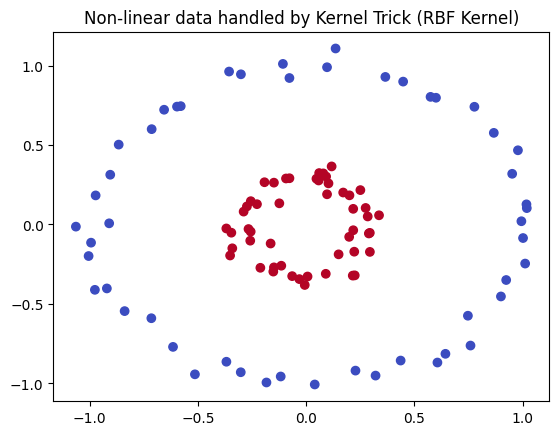

In [6]:
#6
from sklearn.svm import SVC
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Create circular non-linear data
X, y = make_circles(n_samples=100, factor=0.3, noise=0.05)

# Train SVM with RBF kernel
clf = SVC(kernel='rbf')
clf.fit(X, y)

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Non-linear data handled by Kernel Trick (RBF Kernel)")
plt.show()

## **Question 7: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies. Hint:Use SVC(kernel='linear') and SVC(kernel='rbf'), then compare accuracy scores after fitting on the same dataset. (Include your Python code and output in the code box below.)**

### **Answer**

In [5]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Print the accuracies
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.2f}")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.2f}")


Accuracy of SVM with Linear Kernel: 0.94
Accuracy of SVM with RBF Kernel: 0.67


Explanation:

* `SVC(kernel='linear')` uses a linear hyperplane to separate classes.

* `SVC(kernel='rbf')` uses the RBF kernel to handle non-linear decision boundaries.

* `accuracy_score` measures how well the predictions match the true labels.

* In the Wine dataset, the Linear SVM often performs slightly better because the dataset is mostly linearly separable.

## **Question 8: What is the Naïve Bayes classifier, and why is it called "Naïve"?**

## **Answer**

In [7]:
#8
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


## **Question 9: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve**
## **Bayes, and Bernoulli Naïve Bayes**

### **Anwser**

**1. Gaussian Naïve Bayes**
* Used when the features are continuous (numeric).
* Assumes that the data for each class follows a normal (Gaussian) distribution.
**Example**: height, weight, age, or temperature values.
* Often used in datasets like Iris or medical data.
**Example use case:** Predicting whether a patient has a disease based on continuous values like blood pressure or cholesterol level.

**2. Multinomial Naïve Bayes**
* Used when the features are counts or frequencies.
* Commonly used for text classification tasks (e.g., spam detection, sentiment analysis).
* Assumes that feature values represent the number of times something occurs (like word counts).
**Example use case:** Classifying emails as spam or not spam based on how many times words like “free,” “offer,” or “buy” appear.

**3. Bernoulli Naïve Bayes**
* Used when the features are binary (0 or 1) — i.e., whether a feature is present or absent.
* Also used for text classification, but instead of word counts, it looks at whether a word appears at all.

**Example: 1** if a word appears in the email, 0 if it doesn’t.

**Example use case:** Spam detection where we only check whether certain keywords exist or not, not how many times.

## **Question 10:  Breast Cancer Dataset **
**Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer
dataset and evaluate accuracy.
Hint:Use GaussianNB() from sklearn.naive_bayes and the Breast Cancer dataset from
sklearn.datasets.
(Include your Python code and output in the code box below.)**

In [8]:
#10
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create a Gaussian Naïve Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Accuracy of Gaussian Naïve Bayes on Breast Cancer Dataset:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of Gaussian Naïve Bayes on Breast Cancer Dataset: 0.9415204678362573

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

